<a href="https://colab.research.google.com/github/11DiajengNidzom/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [ ]:
from google.colab import drive


# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Transformasi Linier Brightness

Formula: g(x,y) = f(x,y)+b

- g(x,y) adalah nilai pixel setelah transformasi

- f(x,y) adalah nilai pixel asli

- b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


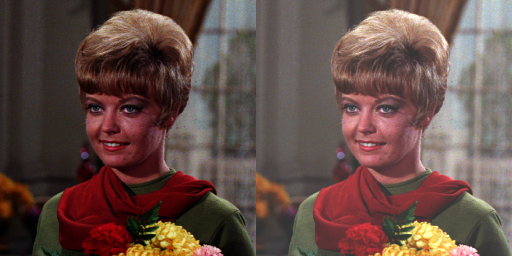

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread("/content/drive/MyDrive/PCVK/Images/female.tiff") # get image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

Transformasi Contrast

Formula: g(x,y) = a * f(x,y) + b

- g(x,y) adalah nilai pixel setelah transformasi
- f(x,y) adalah nilai pixel asli
- a adalah nilai contrast
- b adalah nilai brightness

Mengubah kontras tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 70
Masukkan kontras [1.0 - 3.0]: 1.0


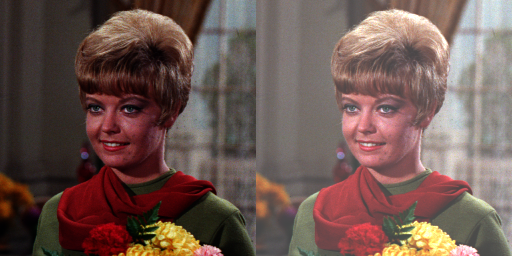

In [5]:
print('Mengubah kontras tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Transformasi Logarithmic Brightness

Formula: s = c * log(1 + r)

c adalah konstanta
r adalah nilai grey-level citra input
s adalah nilai grey-level citra output

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 30


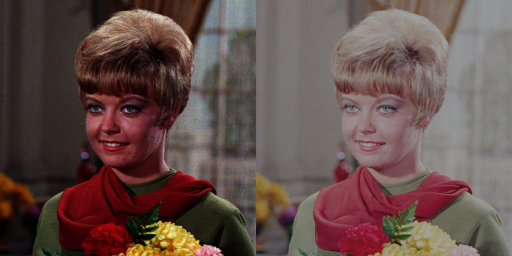

In [6]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Grayscale

Averaging

Formula: (R+G+B)/3

R adalah Red
G adalah Green
B adalah Blue

Implementasikan Transformasi Grayscale menggunakan metode Averaging
-----------------------------------
Averaging


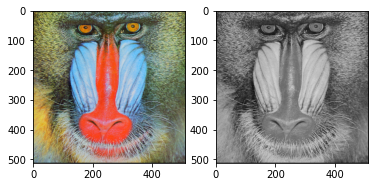

In [7]:
print('Implementasikan Transformasi Grayscale menggunakan metode Averaging')
print('-----------------------------------')

image3 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
averaging_image3 = np.zeros(image3.shape, image3.dtype)

image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

#Akses per piksel
for y in range(image3.shape[0]):
  for x in range(image3.shape[1]):
    blue = image3.item(y,x,0)
    green = image3.item(y,x,1)
    red = image3.item(y,x,2)
    average = (blue + green + red) / 3
    averaging_image3[y,x] = [average, average, average]
    

print('Averaging')
fig, ax = plt.subplots(1,2)
ax[0].imshow(image3)
ax[1].imshow(averaging_image3)

Lightness

Formula: max[R+G+B]+min[R+G+B]/2

R adalah Red
G adalah Green
B adalah Blue

Implementasikan Transformasi Grayscale menggunakan metode Lightness
-----------------------------------
Lightness


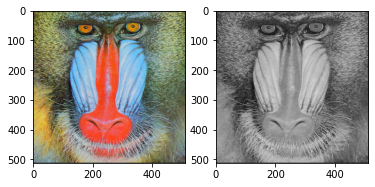

In [8]:
import matplotlib.pyplot as plt

print('Implementasikan Transformasi Grayscale menggunakan metode Lightness')
print('-----------------------------------')

image3 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
lightness_image3 = np.zeros(image3.shape, image3.dtype)

image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

#Akses per piksel
for y in range(image3.shape[0]):
  for x in range(image3.shape[1]):
    blue = image3.item(y,x,0)
    green = image3.item(y,x,1)
    red = image3.item(y,x,2)
    maxBGR = max(blue,green,red)
    minBGR = min(blue, green, red)
    lightness_value = (maxBGR + minBGR) / 2
    lightness_image3[y,x] = [lightness_value, lightness_value, lightness_value]
    
print('Lightness')
fig, ax = plt.subplots(1,2)
ax[0].imshow(image3)
ax[1].imshow(lightness_image3)